In [1]:
%load_ext autoreload

In [191]:
%autoreload 2

import datetime

import pandas as pd

from world_rowing import api
from world_rowing.api import get_worldrowing_data
from world_rowing.livetracker import get_race_livetracker

In [192]:
competition = api.get_most_recent_competition()
competition

id                   5dd7837a-7776-4038-a3fc-0ffa2ee57b39
competitionTypeId    765733fd-a689-4ee8-9bbe-12c32e7d307e
venueId              77d8de2b-7bc2-4b2f-8d58-437442a82cc4
CompetitionCode                               WCp2_2021_1
DisplayName                      2021 World Rowing Cup II
Year                                                 2021
StartDate                             2021-05-21 00:00:00
EndDate                               2021-05-23 00:00:00
EntryDeadlineDate                                    None
IsFisa                                                  1
HasResults                                            1.0
Name: 7, dtype: object

In [202]:
api.cached_worldrowing_data.cache_clear()

In [213]:
events = api.cached_worldrowing_records(
    'event', 
    filter=(
        ('competitionId', most_recent.id),
    ), 
    sort=(
        ('eventId', 'asc'),
        ('Date', 'asc')
    )
)
races = api.cached_worldrowing_records(
    'race', 
    filter=(
        ('event.competitionId', most_recent.id),
    ), 
    sort=(
        ('eventId', 'asc'),
        ('Date', 'asc')
    )
)

In [234]:
live_data = get_race_livetracker(
    races.id[0]
)

In [235]:
live_data

currentPosition              distanceTravelled                    \
                IRL POL SUI2 GBR               IRL   POL  SUI2   GBR   
0                 2   3    1   4                 4     4     5     4   
1                 2   3    4   1                 8     8     8    10   
2                 2   3    4   1                13    13    13    15   
3                 2   1    3   4                18    20    18    19   
4                 2   3    4   1                22    23    22    25   
..              ...  ..  ...  ..               ...   ...   ...   ...   
398               2   3    4   1              1940  1969  1935  1995   
399               2   3    4   1              1945  1974  1939  2000   
400               2   1    3   4              1972  2000  1964  2000   
401               1   2    3   4              2000  2000  1991  2000   
402               2   2    1   4              2000  2000  2000  2000   

    distanceFromLeader      ... strokeRate     metrePerSecond                 \
                   IRL POL  ...       SUI2 GBR            IRL  POL SUI2  GBR   
0                    1   1  ...          0   0            3.3  3.4  3.2  3.8   
1                    2   2  ...         46   0            3.4  3.6  3.6  3.6   
2                    2   2  ...         46  39            3.7  3.9  3.9  3.9   
3                    2   0  ...         46  40            4.1  4.2  4.3  4.3   
4                    3   2  ...         46  41            4.5  4.8  4.7  4.8   
..                 ...  ..  ...        ...  ..            ...  ...  ...  ...   
398                 55  26  ...         41  33            5.6  5.2  5.1  5.1   
399                 55  26  ...         40  33            5.6  5.2  5.0  5.1   
400                 28   0  ...         39  32            5.6  5.3  5.3  4.7   
401                  0   0  ...         39  32            5.3  4.3  5.2  4.7   
402                  0   0  ...         39  32            5.1  4.3  5.1  4.7   

           time                                      
            IRL         POL        SUI2         GBR  
0      1.212121    1.176471    1.562500    1.052632  
1      2.388592    2.287582    2.395833    2.719298  
2      3.739943    3.569633    3.677885    4.001350  
3      4.959455    5.236300    4.840675    4.931582  
4      5.848344    5.861300    5.691739    6.181582  
..          ...         ...         ...         ...  
398  361.770004  361.573995  361.221523  362.138341  
399  362.662861  362.535534  362.021523  363.118733  
400  367.484290  367.441194  366.738504  363.118733  
401  372.767309  367.441194  371.930812  363.118733  
402  372.767309  367.441194  373.695518  363.118733  

[403 rows x 24 columns]

In [237]:
import matplotlib.pyplot as plt

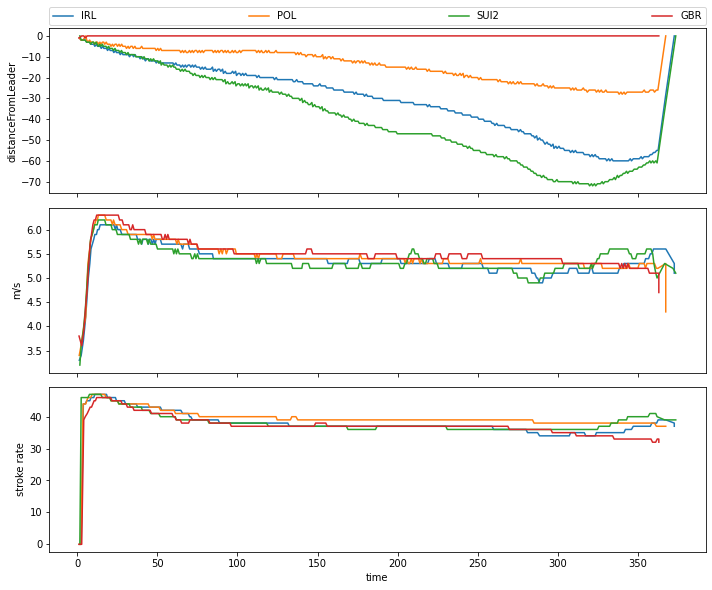

In [240]:
f, axes = plt.subplots(3, figsize=(10, 8), sharex=True)
countries = live_data.time.columns
for c in countries:
    axes[0].plot(
        live_data.time[c], 
        - live_data.distanceFromLeader[c], 
        label=c
    )
    axes[1].plot(
        live_data.time[c], 
        live_data.metrePerSecond[c], 
        label=c
    )
    axes[2].plot(
        live_data.time[c], 
        live_data.strokeRate[c], 
        label=c
    )
    
axes[0].set_ylabel('distanceFromLeader')
axes[1].set_ylabel('m/s')
axes[2].set_ylabel('stroke rate')
axes[2].set_xlabel('time')
    
f.tight_layout()
axes[0].legend(
    bbox_to_anchor=(0., 1.02, 1., .102), 
    loc='lower left',
    ncol=6, mode="expand", borderaxespad=0.)